In [1]:
import pandas as pd
import numpy as np
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import nltk
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\USER\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
news = pd.read_csv('bitcoin_news.csv')
news.head()

,Date,Summary,Tags,Title
0,2018-09-04T08:00:04-04:00,The Tuesday edition of our daily roundup is ja...,"ATM,Blockchain,Brave,Deutsche Börse,Ethereum,G...","The Daily: Wirex Adds Ethereum, Deutsche Börse..."
1,2018-08-02T17:15:26-04:00,Japan’s SBI Group is reportedly planning to cr...,"ATM,BCH,Bitcoin,bitcoin cash,BTC,BTM,coin asse...","SBI Plans Derivatives Platform, Huobi Eyes 30%..."
2,2018-09-05T01:15:31-04:00,Non-custodial crypto trading platform Shapeshi...,"AML,anti-money laundering,Bitcoin,BTC,crypto,C...",Shapeshift Moves to Membership Model Requiring...
3,2018-08-04T04:55:54-04:00,"Intercontinental Exchange (ICE), owner of argu...","401k,Bitcoin,Boston Consulting Group,Canada,CF...",NYSE Owner: Bitcoin Should Be in Retirement Fu...
4,2018-08-06T03:45:21-04:00,Thailand’s central bank has announced the rule...,"bank of thailand,banks,Bitcoin,Bot,BTC,commerc...",Bank of Thailand Green-Lights Financial Compan...


# Date Mutation

In [61]:
news['Datetime'] = list(map(lambda x: datetime.strptime(x[0:10],'%Y-%m-%d'), news['Date']))
news['Year'] = list(map(lambda x: str(datetime.strptime(x[0:10],'%Y-%m-%d').year).zfill(4), news['Date']))
news['Month'] = list(map(lambda x: str(datetime.strptime(x[0:10],'%Y-%m-%d').month).zfill(2), news['Date']))
news['Day'] = list(map(lambda x: str(datetime.strptime(x[0:10],'%Y-%m-%d').day).zfill(2), news['Date']))
news['Numerical_date'] = news['Year'] + news['Month'] + news['Day']
news['Numerical_date'] = [int(i) for i in news['Numerical_date']]

# Date-token dictionary

In [62]:
date_list = list(np.unique(news['Numerical_date']))

In [63]:
lmtizer=nltk.stem.WordNetLemmatizer()

date_token_dict = {}

for i in date_list:
    word_class = nltk.pos_tag(simple_preprocess(news[news['Numerical_date'] == i][['Summary','Title']].to_string(header = False)), tagset = 'universal')
    date_token_dict.update({i : [lmtizer.lemmatize(i[0]) for i in word_class if i[1] in ['NOUN', 'ADJ']], ''})
    
date_token_dict

{20150118: ['week',
  'beginning',
  'alleged',
  'silk',
  'ro',
  'bitcoin',
  'news',
  'roundup',
  'january',
  'th'],
 20150125: ['coinbase',
  'completion',
  'bitcoin',
  'news',
  'roundup',
  'january',
  'th'],
 20150201: ['last', 'week', 'timer', 'news', 'roundup', 'february', 'st'],
 20150222: ['few',
  'week',
  'new',
  'hampshire',
  'house',
  're',
  'bitcoin',
  'news',
  'roundup',
  'february',
  'nd'],
 20150301: ['move',
  'reminiscent',
  'time',
  'bitcoin',
  'news',
  'roundup',
  'march',
  'st'],
 20150315: ['ultra',
  'stealth',
  'bitcoin',
  'company',
  'name',
  'bitcoin',
  'news',
  'roundup',
  'march',
  'th'],
 20150322: ['commerce', 'giant', 'bitcoin', 'news', 'roundup', 'march', 'nd'],
 20150329: ['bitcoin', 'news', 'roundup', 'march', 'th'],
 20150503: ['circle', 'internet', 'financial', 'ltd', 'news', 'roundup'],
 20150504: ['welcome', 'new', 'bitcoin', 'com'],
 20150524: ['close', 'bitcoin', 'news', 'roundup'],
 20150609: ['future',
  'bitcoi

In [64]:
date_token_dict.values()

dict_values([['week', 'beginning', 'alleged', 'silk', 'ro', 'bitcoin', 'news', 'roundup', 'january', 'th'], ['coinbase', 'completion', 'bitcoin', 'news', 'roundup', 'january', 'th'], ['last', 'week', 'timer', 'news', 'roundup', 'february', 'st'], ['few', 'week', 'new', 'hampshire', 'house', 're', 'bitcoin', 'news', 'roundup', 'february', 'nd'], ['move', 'reminiscent', 'time', 'bitcoin', 'news', 'roundup', 'march', 'st'], ['ultra', 'stealth', 'bitcoin', 'company', 'name', 'bitcoin', 'news', 'roundup', 'march', 'th'], ['commerce', 'giant', 'bitcoin', 'news', 'roundup', 'march', 'nd'], ['bitcoin', 'news', 'roundup', 'march', 'th'], ['circle', 'internet', 'financial', 'ltd', 'news', 'roundup'], ['welcome', 'new', 'bitcoin', 'com'], ['close', 'bitcoin', 'news', 'roundup'], ['future', 'bitcoin', 'journalism', 'current', 'financial', 'infrastructure', 'ecosy', 'red', 'cross', 'donation', 'astray', 'time'], ['bitcoin', 'encryption', 'freedo'], ['sidechains', 'development', 'blockstream', 'rele

# ■ Frequently metioned countries

In [125]:
countries = ['japanese','chinese','korean','russian','indian','uk']

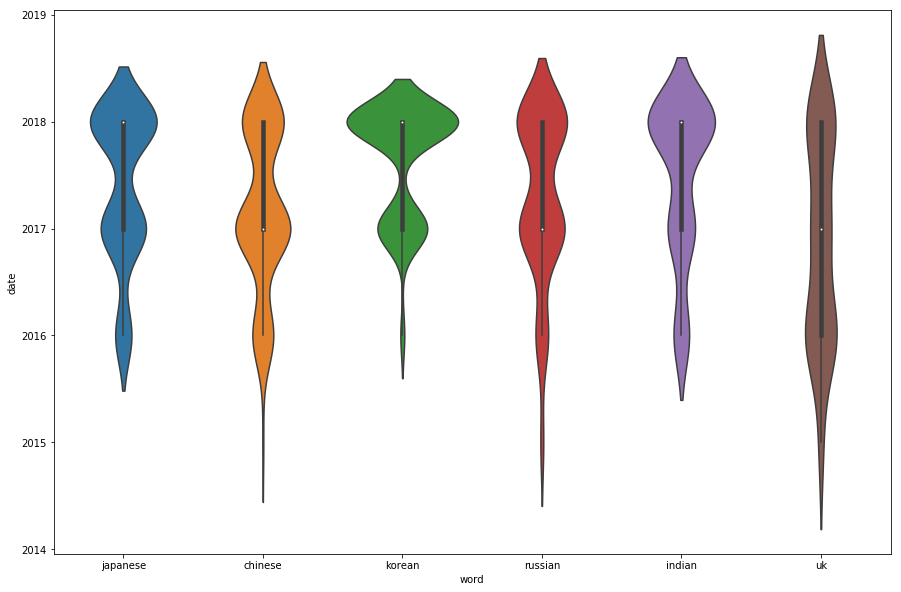

In [126]:
con_df = pd.DataFrame()

for i in countries:
    date = [int(str(i)[0:4]) for i in list(date_token_dict.keys())]
    freq = list(map(lambda x: x.count(i), list(date_token_dict.values())))
    word = i
    
    con_df = pd.concat([con_df, pd.DataFrame({'date':date, 'freq':freq, 'word':word})], axis=0)

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1, 1, 1)
ax1 = sns.violinplot(x='word',y='date',data=con_df[con_df['freq'] != 0])

## 2017.x Distribution

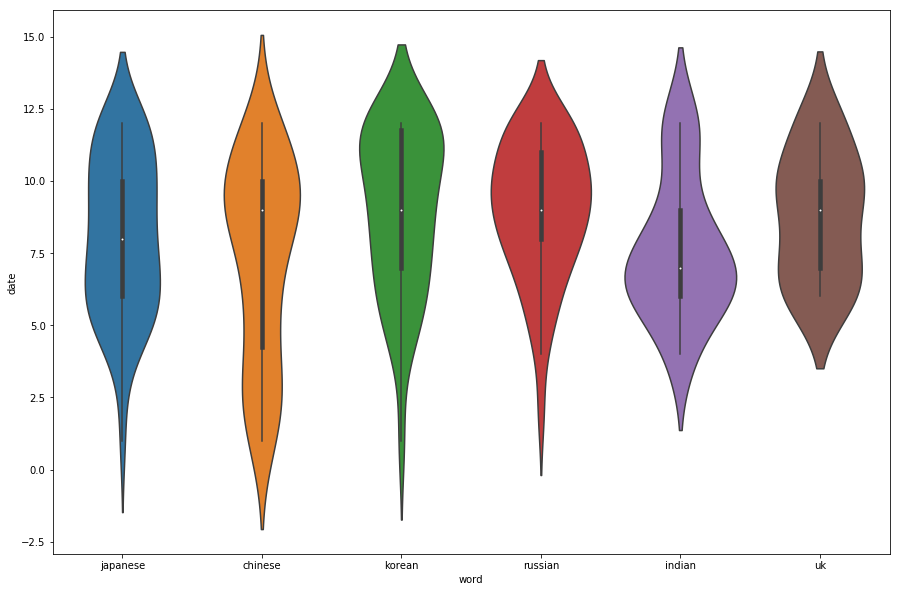

In [127]:
con_df = pd.DataFrame()

dict_for_month = {k: v for k, v in date_token_dict.items() if k > 20170101 and k < 20180101}

for i in countries:
    date = [int(str(i)[4:6]) for i in list(dict_for_month.keys())]
    freq = list(map(lambda x: x.count(i), list(dict_for_month.values())))
    word = i
    
    con_df = pd.concat([con_df, pd.DataFrame({'date':date, 'freq':freq, 'word':word})], axis=0)

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1, 1, 1)
ax1 = sns.violinplot(x='word',y='date',data=con_df[con_df['freq'] != 0])

## 2017.11.x Distribution

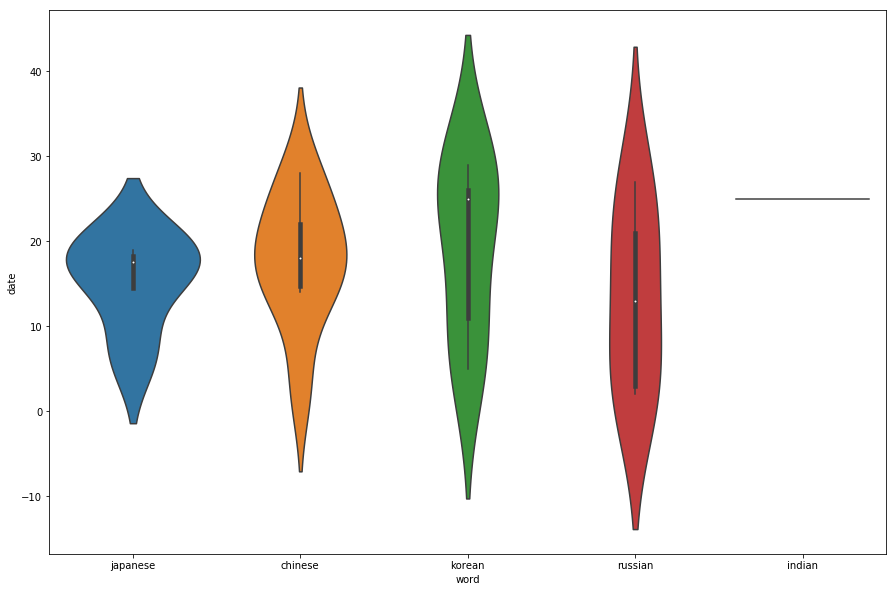

In [128]:
con_df = pd.DataFrame()

dict_for_month = {k: v for k, v in date_token_dict.items() if k > 20171101 and k < 20171201}

for i in countries:
    date = [int(str(i)[6:8]) for i in list(dict_for_month.keys())]
    freq = list(map(lambda x: x.count(i), list(dict_for_month.values())))
    word = i
    
    con_df = pd.concat([con_df, pd.DataFrame({'date':date, 'freq':freq, 'word':word})], axis=0)

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1, 1, 1)
ax1 = sns.violinplot(x='word',y='date',data=con_df[con_df['freq'] != 0])

## 2017.12.x Distribution

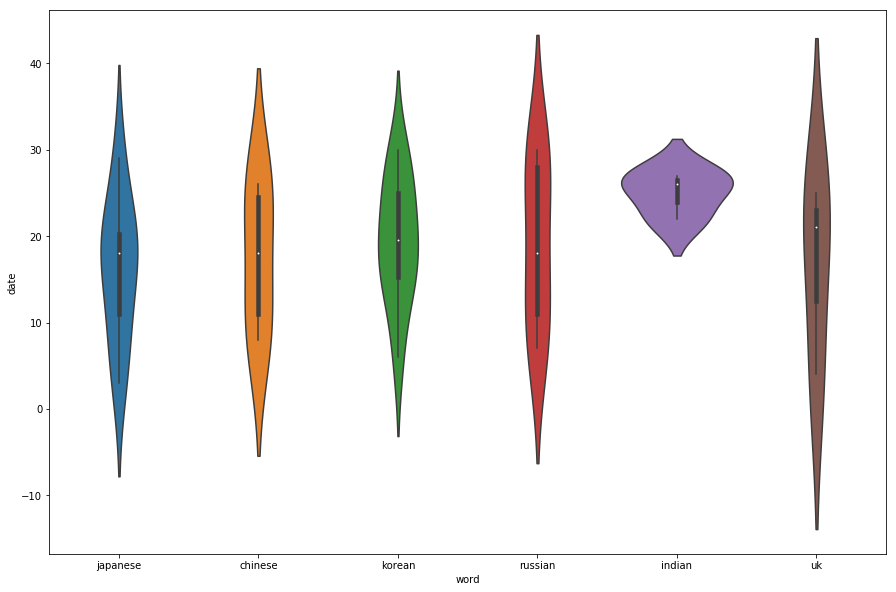

In [129]:
con_df = pd.DataFrame()

dict_for_month = {k: v for k, v in date_token_dict.items() if k > 20171201 and k < 20180101}

for i in countries:
    date = [int(str(i)[6:8]) for i in list(dict_for_month.keys())]
    freq = list(map(lambda x: x.count(i), list(dict_for_month.values())))
    word = i
    
    con_df = pd.concat([con_df, pd.DataFrame({'date':date, 'freq':freq, 'word':word})], axis=0)

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1, 1, 1)
ax1 = sns.violinplot(x='word',y='date',data=con_df[con_df['freq'] != 0])

## 2018.x Distribution

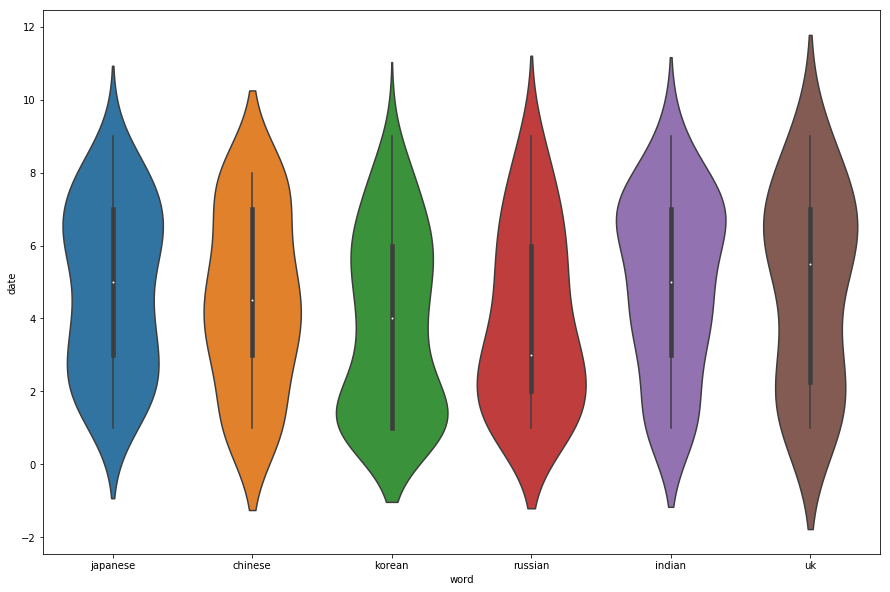

In [131]:
con_df = pd.DataFrame()

dict_for_month = {k: v for k, v in date_token_dict.items() if k > 20180101 and k < 20190101}

for i in countries:
    date = [int(str(i)[4:6]) for i in list(dict_for_month.keys())]
    freq = list(map(lambda x: x.count(i), list(dict_for_month.values())))
    word = i
    
    con_df = pd.concat([con_df, pd.DataFrame({'date':date, 'freq':freq, 'word':word})], axis=0)

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1, 1, 1)
ax1 = sns.violinplot(x='word',y='date',data=con_df[con_df['freq'] != 0])

## 2018.1.x Distribution

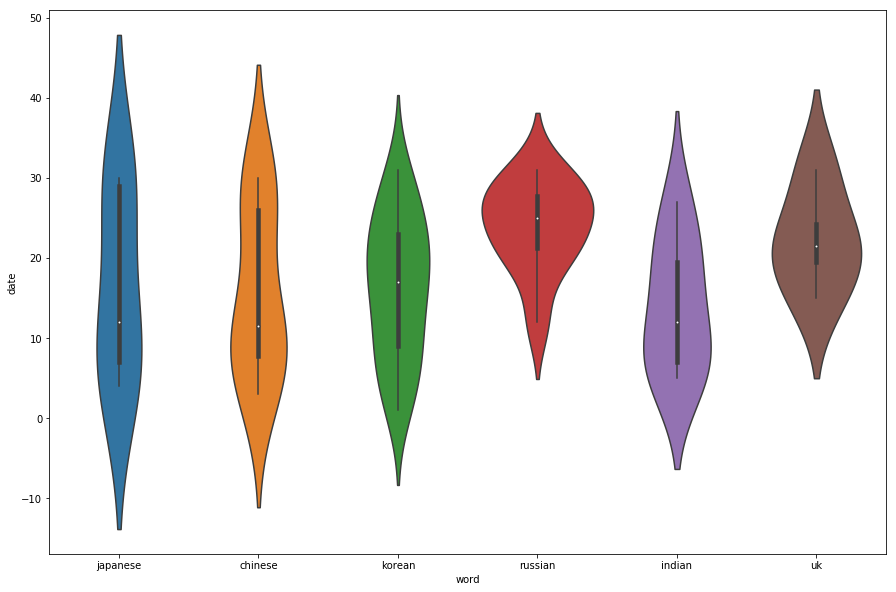

In [130]:
con_df = pd.DataFrame()

dict_for_month = {k: v for k, v in date_token_dict.items() if k > 20171231 and k < 20180201}

for i in countries:
    date = [int(str(i)[6:8]) for i in list(dict_for_month.keys())]
    freq = list(map(lambda x: x.count(i), list(dict_for_month.values())))
    word = i
    
    con_df = pd.concat([con_df, pd.DataFrame({'date':date, 'freq':freq, 'word':word})], axis=0)

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1, 1, 1)
ax1 = sns.violinplot(x='word',y='date',data=con_df[con_df['freq'] != 0])

# ■ Frequently mentioned words

In [140]:
words = ['mining','regulation','platform','security','miner','investor','government','tax','currency','exchange']

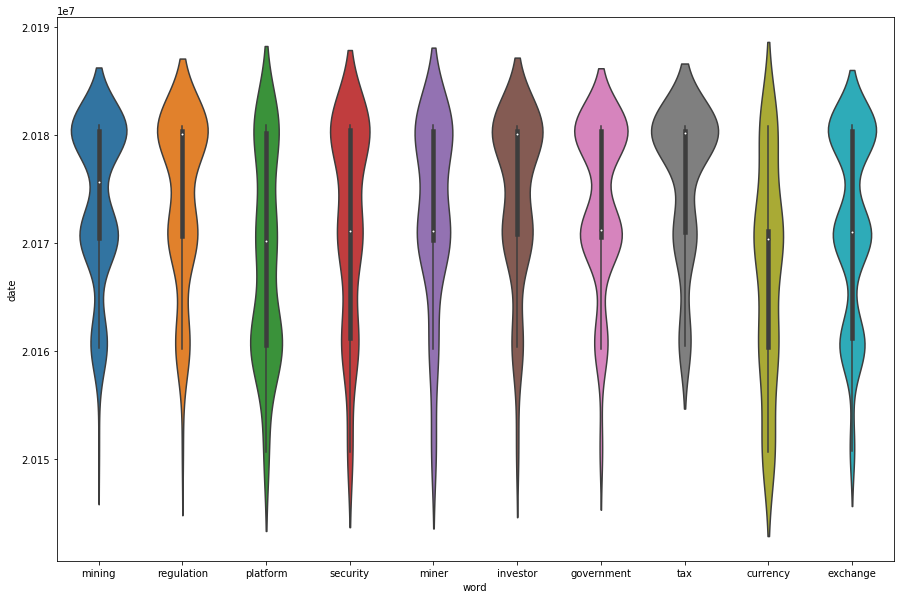

In [141]:
con_df = pd.DataFrame()

for i in words:
    date = list(date_token_dict.keys())
    freq = list(map(lambda x: x.count(i), list(date_token_dict.values())))
    word = i
    
    con_df = pd.concat([con_df, pd.DataFrame({'date':date, 'freq':freq, 'word':word})], axis=0)

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1, 1, 1)
ax1 = sns.violinplot(x='word',y='date',data=con_df[con_df['freq'] != 0])

## 2017.x Distribution

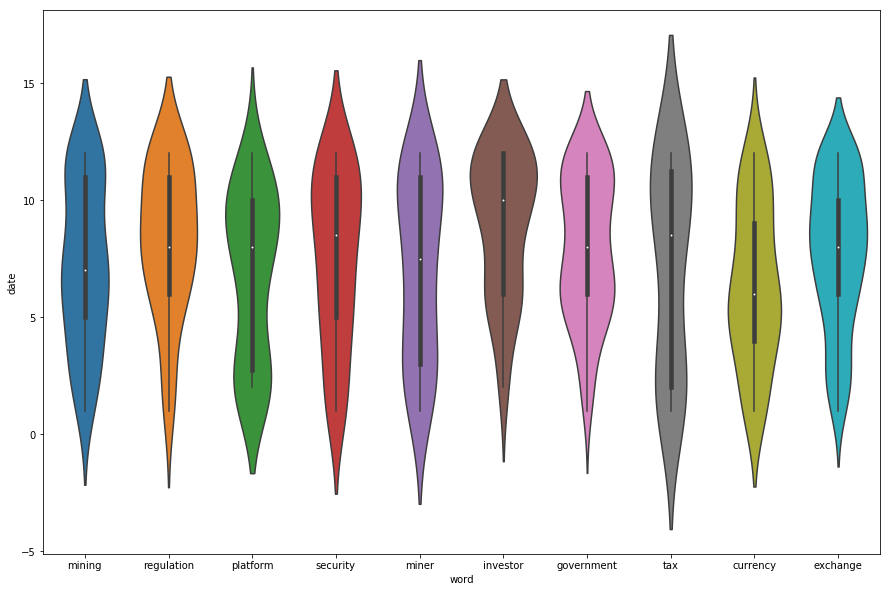

In [142]:
con_df = pd.DataFrame()

dict_for_month = {k: v for k, v in date_token_dict.items() if k > 20170101 and k < 20180101}

for i in words:
    date = [int(str(i)[4:6]) for i in list(dict_for_month.keys())]
    freq = list(map(lambda x: x.count(i), list(dict_for_month.values())))
    word = i
    
    con_df = pd.concat([con_df, pd.DataFrame({'date':date, 'freq':freq, 'word':word})], axis=0)

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1, 1, 1)
ax1 = sns.violinplot(x='word',y='date',data=con_df[con_df['freq'] != 0])

## 2017.11.x Distribution

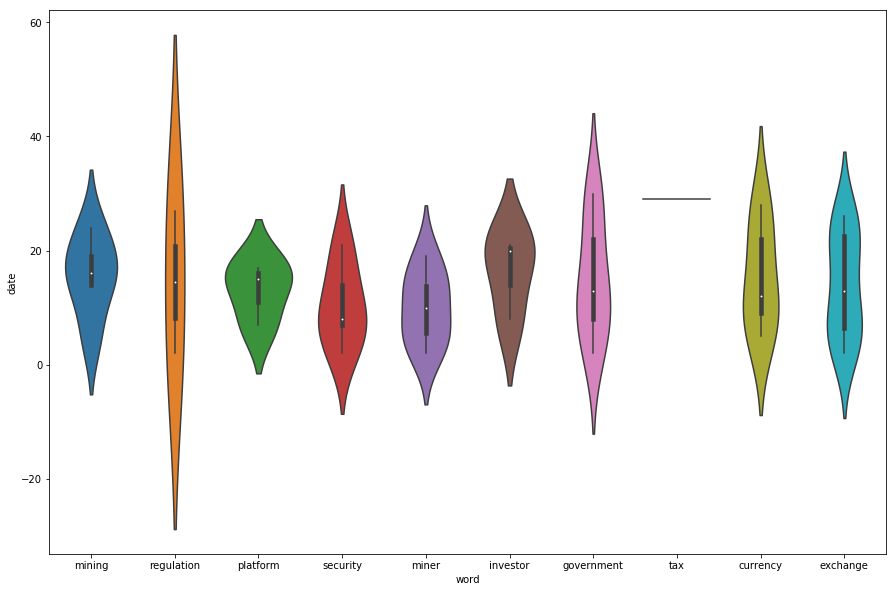

In [143]:
con_df = pd.DataFrame()

dict_for_month = {k: v for k, v in date_token_dict.items() if k > 20171101 and k < 20171201}

for i in words:
    date = [int(str(i)[6:8]) for i in list(dict_for_month.keys())]
    freq = list(map(lambda x: x.count(i), list(dict_for_month.values())))
    word = i
    
    con_df = pd.concat([con_df, pd.DataFrame({'date':date, 'freq':freq, 'word':word})], axis=0)

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1, 1, 1)
ax1 = sns.violinplot(x='word',y='date',data=con_df[con_df['freq'] != 0])

## 2017.12.x Distribution

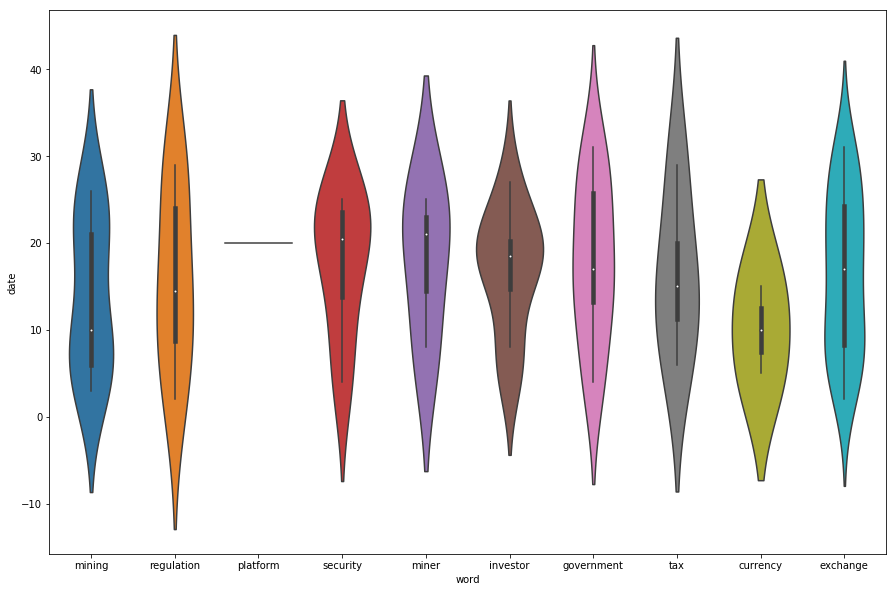

In [144]:
con_df = pd.DataFrame()

dict_for_month = {k: v for k, v in date_token_dict.items() if k > 20171201 and k < 20180101}

for i in words:
    date = [int(str(i)[6:8]) for i in list(dict_for_month.keys())]
    freq = list(map(lambda x: x.count(i), list(dict_for_month.values())))
    word = i
    
    con_df = pd.concat([con_df, pd.DataFrame({'date':date, 'freq':freq, 'word':word})], axis=0)

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1, 1, 1)
ax1 = sns.violinplot(x='word',y='date',data=con_df[con_df['freq'] != 0])

## 2018.x Distribution

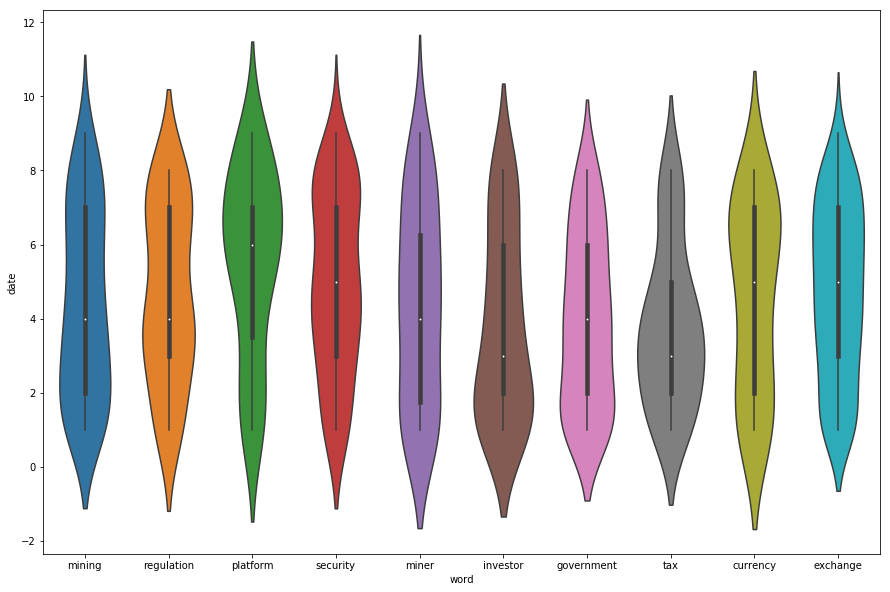

In [145]:
con_df = pd.DataFrame()

dict_for_month = {k: v for k, v in date_token_dict.items() if k > 20180101 and k < 20190101}

for i in words:
    date = [int(str(i)[4:6]) for i in list(dict_for_month.keys())]
    freq = list(map(lambda x: x.count(i), list(dict_for_month.values())))
    word = i
    
    con_df = pd.concat([con_df, pd.DataFrame({'date':date, 'freq':freq, 'word':word})], axis=0)

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1, 1, 1)
ax1 = sns.violinplot(x='word',y='date',data=con_df[con_df['freq'] != 0])

## 2018.1.x Distribution

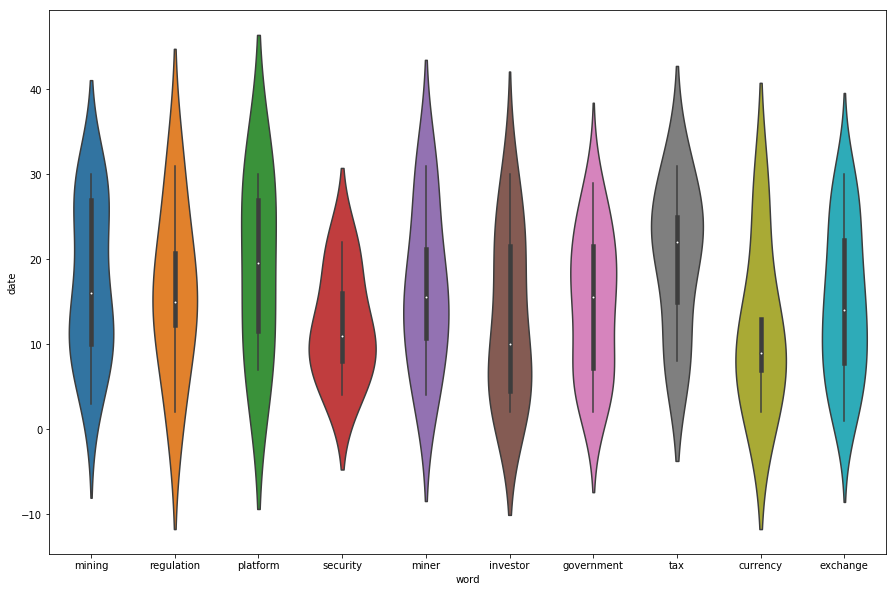

In [146]:
con_df = pd.DataFrame()

dict_for_month = {k: v for k, v in date_token_dict.items() if k > 20171231 and k < 20180201}

for i in words:
    date = [int(str(i)[6:8]) for i in list(dict_for_month.keys())]
    freq = list(map(lambda x: x.count(i), list(dict_for_month.values())))
    word = i
    
    con_df = pd.concat([con_df, pd.DataFrame({'date':date, 'freq':freq, 'word':word})], axis=0)

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1, 1, 1)
ax1 = sns.violinplot(x='word',y='date',data=con_df[con_df['freq'] != 0])